# Machine Learning Pipeline - Model Training

In the following notebooks, we will go through the implementation of each of the steps in the Machine Learning Pipeline.

We will discuss:

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. **Model Training**
5. Obtaining Predictions / Scoring

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# to save the model
import joblib

# to build the model
from sklearn.linear_model import Lasso, LinearRegression

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# to scale the features
from sklearn.preprocessing import MinMaxScaler

# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load the train and test set with the engineered variables
X_train = pd.read_csv('xtrain_unscaled.csv')
X_test = pd.read_csv('xtest_unscaled.csv')

In [3]:
# drop the rank feature as it is unneeded by the model
X_train = X_train.drop('rank',axis=1)

In [4]:
# load the target
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')

In [5]:
# load the pre-selected features
features = pd.read_csv('selected_features.csv')
features = features['0'].to_list()

# display the final feature set
features 

['address_U',
 'schoolsup_yes',
 'higher_yes',
 'age',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'guardian',
 'traveltime',
 'studytime',
 'failures']

In [6]:
[feat for feat in X_train.columns if feat not in features]

['reason',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'school_MS',
 'sex_M',
 'famsize_LE3',
 'Pstatus_T',
 'famsup_yes',
 'paid_yes',
 'activities_yes',
 'nursery_yes',
 'internet_yes',
 'romantic_yes']

In [7]:
# reduce the train and test set to the selected features
X_train = X_train[features]
X_test = X_test[features]

# Feature Scaling

In [8]:
# list out the features to be scaled
scaled = ['age','Medu','Fedu','Mjob','Fjob','guardian','traveltime','studytime','failures']

Notice the large difference between the scale of the age variables and the other variables:

In [9]:
X_train[scaled].describe()

,age,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures
count,276.000000,276.00000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,16.695652,2.73913,2.539855,3.677536,4.282609,2.594203,1.456522,2.028986,0.322464
std,1.293951,1.08077,1.079666,1.290949,1.054784,0.662092,0.699294,0.830702,0.704016
min,15.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.00000,2.000000,3.000000,4.000000,2.000000,1.000000,1.000000,0.000000
50%,17.000000,3.00000,3.000000,4.000000,5.000000,3.000000,1.000000,2.000000,0.000000
75%,18.000000,4.00000,3.000000,5.000000,5.000000,3.000000,2.000000,2.000000,0.000000
max,22.000000,4.00000,4.000000,5.000000,5.000000,3.000000,4.000000,4.000000,3.000000


In [10]:
# load the scaler object
scaler = MinMaxScaler()

# fit the train set
scaler.fit(X_train[scaled])

# transform the train and test set
X_train[scaled] = scaler.transform(X_train[scaled])
X_test[scaled] = scaler.transform(X_test[scaled])

In [11]:
# display the scaled dataset
X_train[scaled].head()

,age,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures
0,0.142857,1.00,0.333333,0.50,1.00,1.0,0.000000,0.333333,0.000000
1,0.285714,1.00,1.000000,0.50,1.00,1.0,0.333333,0.333333,0.000000
2,0.142857,0.50,1.000000,1.00,0.25,0.5,0.333333,0.333333,0.000000
3,0.142857,0.50,0.333333,0.75,1.00,1.0,0.333333,0.333333,0.000000
4,0.142857,0.25,0.333333,1.00,1.00,1.0,0.333333,0.000000,0.333333


Let's confirm our scaling operation:

In [12]:
X_train[scaled].describe().round(2)

,age,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures
count,276.00,276.00,276.00,276.00,276.00,276.00,276.00,276.00,276.00
mean,0.24,0.68,0.51,0.67,0.82,0.80,0.15,0.34,0.11
std,0.18,0.27,0.36,0.32,0.26,0.33,0.23,0.28,0.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.14,0.50,0.33,0.50,0.75,0.50,0.00,0.00,0.00
50%,0.29,0.75,0.67,0.75,1.00,1.00,0.00,0.33,0.00
75%,0.43,1.00,0.67,1.00,1.00,1.00,0.33,0.33,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Our scaled variables now range between 0 and 1.

# Model Training: Lasso Regression

In [13]:
# instantiate the model object
las_model = Lasso(alpha=0.001, random_state=0)

# fit the model
las_model.fit(X_train,y_train)

Lasso(alpha=0.001, random_state=0)

In [14]:
# make predictions on the train set
las_pred = las_model.predict(X_train)

# evaluate the model
print(f'train mse: {int(mean_squared_error(y_train,las_pred))}')
print(f'train rmse: {(int(mean_squared_error(y_train,las_pred)))**0.5}')
print(f'train r2: {r2_score(y_train,las_pred)}')
print()

train mse: 14
train rmse: 3.7416573867739413
train r2: 0.20020311080698627



Like we anticipated during feature selection, our model isn't very efficient. Even for the train set, it only explains about 20% of the variance in the target variable. We can expect the results on the test set won't be any better.

In [15]:
# make predictions on the test set
las_pred = las_model.predict(X_test)

# evaluate the model
print(f'test mse: {int(mean_squared_error(y_test,las_pred))}')
print(f'test rmse: {(int(mean_squared_error(y_test,las_pred)))**0.5}')
print(f'test r2: {r2_score(y_test,las_pred)}')
print()

test mse: 27
test rmse: 5.196152422706632
test r2: 0.024124089072350086



The model even performs worse on the test data -  it only explains just 2.4% of the variance in the target. This highlights the limited nature of the features and the prevalence of noise in the data.

Let's try a different model and observe the results.

# Model Training: Linear Regression

In [16]:
# instantiate the model object
lin_model = LinearRegression()

# fit the model
lin_model.fit(X_train, y_train)

LinearRegression()

In [17]:
# make predictions on the train set
lin_pred = lin_model.predict(X_train)

# evaluate the model
print(f'train mse: {int(mean_squared_error(y_train,lin_pred))}')
print(f'train rmse: {(int(mean_squared_error(y_train,lin_pred)))**0.5}')
print(f'train r2: {r2_score(y_train,lin_pred)}')
print()

train mse: 14
train rmse: 3.7416573867739413
train r2: 0.20021122190327312



In [18]:
# make predictions on the test set
lin_pred = lin_model.predict(X_test)

# evaluate the model
print(f'test mse: {int(mean_squared_error(y_test,lin_pred))}')
print(f'test rmse: {(int(mean_squared_error(y_test,lin_pred)))**0.5}')
print(f'test r2: {r2_score(y_test,lin_pred)}')
print()

test mse: 27
test rmse: 5.196152422706632
test r2: 0.023760080935216976



The results for the linear regression experiment mirror the results we obtained from the lasso regression for the train and test sets confirming the inefficiency of the model.

Let's evaluate the predictions against the actual values in a scatterplot.

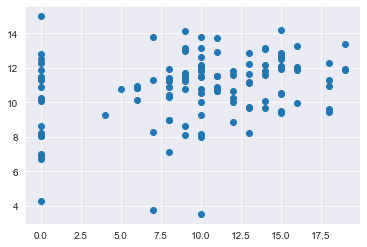

In [19]:
# y_test vs lasso regression predictions
plt.scatter(y_test,las_pred)

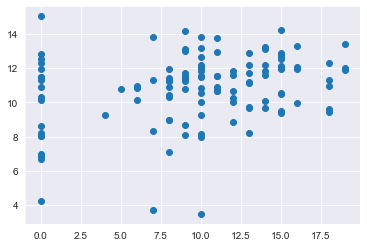

In [20]:
# y_test vs linear regression predictions
plt.scatter(y_test,lin_pred)

The plots confirm our findings on the models we have trained.